# Linear Regression

# Import the Libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

# Import Numpy and Pandas Libraries

In [2]:
import numpy as np
import pandas as pd

# Import data visualization libraries

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Import the dataset

In [4]:
dataset = pd.read_csv('Factory_Salary.csv')

In [5]:
dataset

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,01-01-2009,Metal heater,7,Heating furnaces,22,580,26020.00000
1,01-01-2009,Metal heater,6,Heating furnaces,22,580,22980.00000
2,01-01-2009,Metal heater,5,Heating furnaces,22,580,20350.00000
3,01-01-2009,Metal heater,5,Heating furnaces,22,580,20350.00000
4,01-01-2009,Metal heater,4,Heating furnaces,22,580,18090.00000
...,...,...,...,...,...,...,...
259,01-08-2009,Quality controller,7,Control and measuring equipment,0,1180,26342.23529
260,01-09-2009,Quality controller,7,Control and measuring equipment,0,1080,25044.58824
261,01-10-2009,Quality controller,7,Control and measuring equipment,0,780,22060.00000
262,01-11-2009,Quality controller,7,Control and measuring equipment,0,1020,24266.00000


# Understand the dataset

In [8]:
dataset.shape

(264, 7)

In [9]:
dataset.head()

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,01-01-2009,Metal heater,7,Heating furnaces,22,580,26020.0
1,01-01-2009,Metal heater,6,Heating furnaces,22,580,22980.0
2,01-01-2009,Metal heater,5,Heating furnaces,22,580,20350.0
3,01-01-2009,Metal heater,5,Heating furnaces,22,580,20350.0
4,01-01-2009,Metal heater,4,Heating furnaces,22,580,18090.0


# Slicing the dataset

In [11]:
dataset = dataset.drop(['Date','Profession','Equipment','Insalubrity','Rank'],axis = 1)

In [12]:
dataset

,Size_Production,Salary
0,580,26020.00000
1,580,22980.00000
2,580,20350.00000
3,580,20350.00000
4,580,18090.00000
...,...,...
259,1180,26342.23529
260,1080,25044.58824
261,780,22060.00000
262,1020,24266.00000


In [15]:
x = dataset.iloc[:,0]

In [16]:
x.shape

(264,)

In [17]:
x

0       580
1       580
2       580
3       580
4       580
       ... 
259    1180
260    1080
261     780
262    1020
263     810
Name: Size_Production, Length: 264, dtype: int64

In [18]:
x = dataset.iloc[:,0].values.reshape(-1,1)

In [19]:
x.shape

(264, 1)

In [20]:
x

array([[ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 580],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 790],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [ 820],
       [1200],
       [1200],
       [1200],
       [1200],
       [1200],
       [1200],
       [12

In [21]:
y = dataset.iloc[:,-1].values.reshape(-1,1)

In [22]:
y.shape

(264, 1)

In [23]:
y

array([[26020.     ],
       [22980.     ],
       [20350.     ],
       [20350.     ],
       [18090.     ],
       [18090.     ],
       [16110.     ],
       [25300.     ],
       [22260.     ],
       [17370.     ],
       [25300.     ],
       [22260.     ],
       [17370.     ],
       [15420.     ],
       [17010.     ],
       [15420.     ],
       [19630.     ],
       [17830.     ],
       [17830.     ],
       [15570.     ],
       [26020.     ],
       [22980.     ],
       [20350.     ],
       [20350.     ],
       [18090.     ],
       [18090.     ],
       [16110.     ],
       [25300.     ],
       [22260.     ],
       [17370.     ],
       [25300.     ],
       [22260.     ],
       [17370.     ],
       [15420.     ],
       [17010.     ],
       [15420.     ],
       [19630.     ],
       [17830.     ],
       [17830.     ],
       [15570.     ],
       [26020.     ],
       [22980.     ],
       [20350.     ],
       [20350.     ],
       [18090.     ],
       [18

# Scatter plot

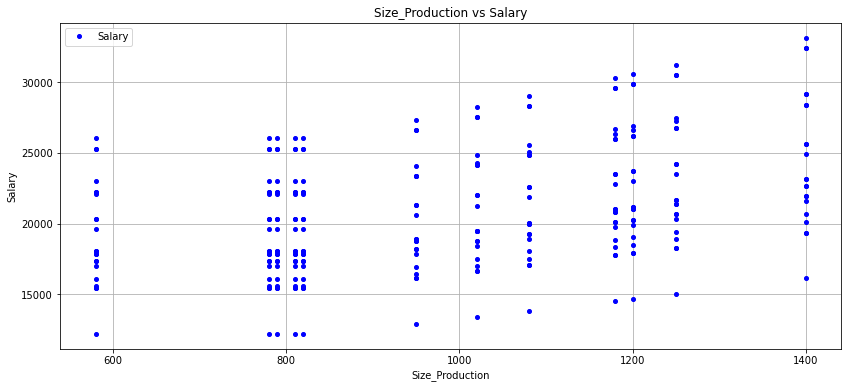

In [24]:
plt.rcParams["figure.figsize"]=[14,6]
dataset.plot(x='Size_Production',y='Salary',style='.',color='blue',markersize=8)
plt.title('Size_Production vs Salary')
plt.xlabel('Size_Production')
plt.ylabel('Salary')
plt.grid()
plt.show()

# Divide the dataset into training and test set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=100)

In [27]:
x_train.shape

(184, 1)

In [28]:
x_test.shape

(80, 1)

In [29]:
y_train.shape

(184, 1)

In [30]:
y_test.shape

(80, 1)

# Perform the Linear Regression

# Import the function

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

# Train the Model

In [33]:
lm.fit(x_train, y_train)

LinearRegression()

# Predict the chance of admit - Testing phase

In [34]:
y_pred = lm.predict(x_test)

In [35]:
y_pred

array([[22741.26241756],
       [21883.65478276],
       [23098.59893206],
       [22741.26241756],
       [20954.57984505],
       [19954.03760445],
       [20025.50490735],
       [21454.85096535],
       [23098.59893206],
       [20954.57984505],
       [22598.32781176],
       [21454.85096535],
       [20025.50490735],
       [21454.85096535],
       [20954.57984505],
       [19954.03760445],
       [20025.50490735],
       [24170.60847557],
       [24170.60847557],
       [21454.85096535],
       [23098.59893206],
       [20954.57984505],
       [21454.85096535],
       [21454.85096535],
       [19954.03760445],
       [19811.10299864],
       [24170.60847557],
       [19954.03760445],
       [22741.26241756],
       [23098.59893206],
       [21883.65478276],
       [22598.32781176],
       [19811.10299864],
       [21883.65478276],
       [19811.10299864],
       [20025.50490735],
       [21883.65478276],
       [19811.10299864],
       [19811.10299864],
       [20954.57984505],


# Check our Prediction

In [36]:
check = pd.DataFrame(x_test,columns = ['Size_Production'])

In [37]:
check['Acutal Salary']=y_test

In [38]:
check['Predicted Salary'] = y_pred

In [39]:
check

,Size_Production,Acutal Salary,Predicted Salary
0,1200,14687.64706,22741.262418
1,1080,29004.58824,21883.654783
2,1250,27250.58824,23098.598932
3,1200,26601.76471,22741.262418
4,950,26597.64706,20954.579845
...,...,...,...
75,820,15420.00000,20025.504907
76,790,20350.00000,19811.102999
77,810,17370.00000,19954.037604
78,580,22260.00000,18310.289638


# Visualize the regressor line

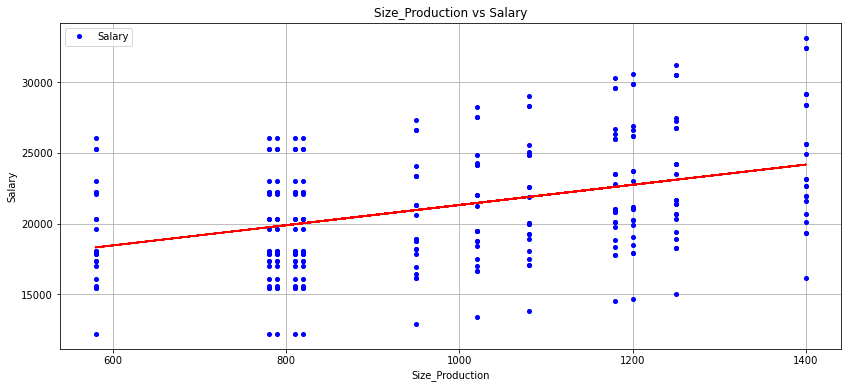

In [41]:
plt.rcParams["figure.figsize"]=[14,6]
dataset.plot(x='Size_Production',y='Salary',style='.',color='blue',markersize=8)
plt.plot(x_test,y_pred,color='red')
plt.title('Size_Production vs Salary')
plt.xlabel('Size_Production')
plt.ylabel('Salary')
plt.grid()
plt.show()